# Exploratory Data Analysis and Preprocessing
This notebook performs EDA and preprocessing on the UCI Energy Efficiency Dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_excel('../data/raw/ENB2012_data.xlsx')

In [2]:
# Rename columns
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
              'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Distribution', 
              'Heating_Load', 'Cooling_Load']


In [3]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())


Summary Statistics:
       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Distribution  \
count       768.00000   768.000000    768.000000             768.00000   
mean          5.25000     3.500000      0.234375               2.81250   
std           1.75114     1.118763      0.133221               1.55096   
min           3.50000     2.000000      0.000000              

In [4]:
# Check missing values
print('\nMissing Values:')
print(df.isnull().sum())



Missing Values:
Relative_Compactness    0
Surface_Area            0
Wall_Area               0
Roof_Area               0
Overall_Height          0
Orientation             0
Glazing_Area            0
Glazing_Distribution    0
Heating_Load            0
Cooling_Load            0
dtype: int64


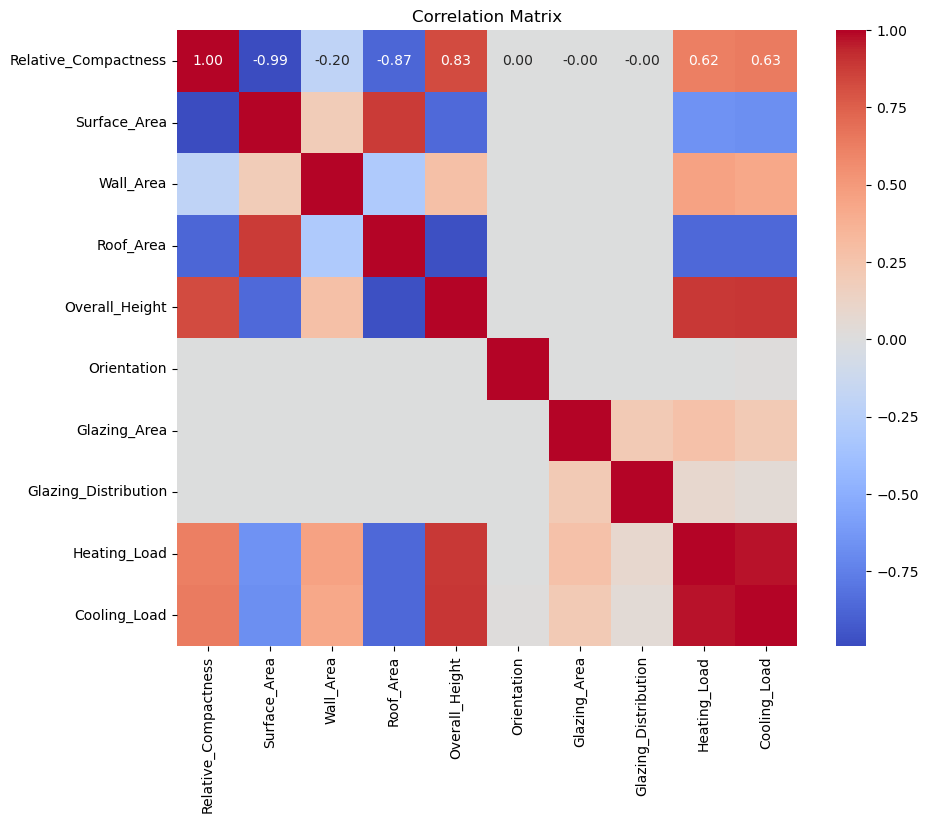

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png')
plt.show()


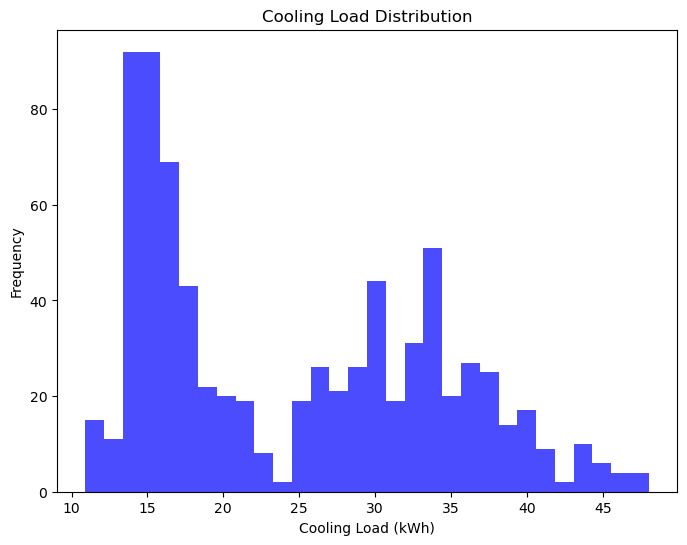

In [7]:
# Cooling Load distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Cooling_Load'], bins=30, color='blue', alpha=0.7)
plt.title('Cooling Load Distribution')
plt.xlabel('Cooling Load (kWh)')
plt.ylabel('Frequency')
plt.savefig('../figures/cooling_load_histogram.png')
plt.show()


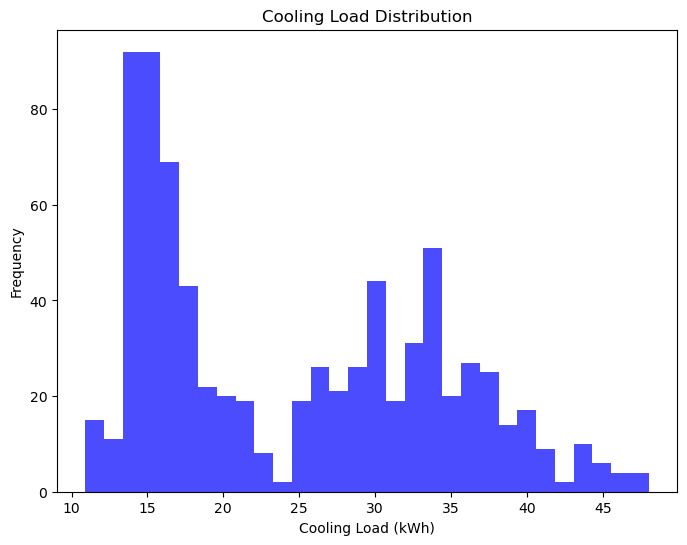

In [8]:
# Cooling Load distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Cooling_Load'], bins=30, color='blue', alpha=0.7)
plt.title('Cooling Load Distribution')
plt.xlabel('Cooling Load (kWh)')
plt.ylabel('Frequency')
plt.savefig('../figures/cooling_load_histogram.png')
plt.show()


In [9]:
# Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df

df = remove_outliers(df, 'Cooling_Load')


In [10]:
# Normalize features
scaler = MinMaxScaler()
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
            'Overall_Height', 'Glazing_Area']
df[features] = scaler.fit_transform(df[features])


In [11]:
# Feature engineering: Synthetic PUE
df['PUE'] = df['Cooling_Load'] / df['Cooling_Load'].mean() + 1.0


In [12]:
# Save preprocessed data
df.to_csv('../data/processed/preprocessed_energy_data.csv', index=False)
print('Preprocessed data saved to ../data/processed/preprocessed_energy_data.csv')

Preprocessed data saved to ../data/processed/preprocessed_energy_data.csv
